So, here l will predict the stock price of Facebook.  Therefore,  will try to  predict the upward/downward trends in the Facebook stock price.

To predict the stock price, a "stacked" LSTM model will be utilized to capture the upward/downward trends in the facebook stock price. 



In [35]:
#Import Libraries
import math
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd


Import Training Dataset


In [36]:
#Load driver helper and mount
from google.colab import drive
#This will prompt for authorization
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
train_dataset = pd.read_csv('/content/drive/My Drive/MetaData/META.csv')
train_set = train_dataset.iloc[:,1:2].values
print(train_set[0:5])


[[338.799988]
 [341.5     ]
 [346.679993]
 [360.910004]
 [369.579987]]


Scale Features


In [38]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
train_set_scaled = sc.fit_transform(train_set)
print(train_set_scaled[0:5])

[[0.80976883]
 [0.82174706]
 [0.84472738]
 [0.90785684]
 [0.94632001]]


In [39]:
train_index = train_set.shape[0]
print(train_index)

253


Construct a data structure encompassing 60 timesteps
and one output


In [40]:
X_train = []
y_train = []
for i in range (30, train_index):
 X_train.append(train_set_scaled[i-30:i,0])
 y_train.append(train_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)


Shape data to serve as input to the LSTM model


In [41]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(223, 30, 1)

Construct the LSTM model


In [42]:
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
#Regressor_model is an object of a sequential class which is a sequence
 #of layers
#Regression is about predicting continuous values
Regressor_model = Sequential()

Add first LSTM layer with dropout regularization

In [47]:
#Adding the first LSTM layer with dropout regularization
Regressor_model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1],1)))
Regressor_model.add(Dropout(0.2))


Add second LSTM layer with dropout regularization

In [48]:
#Add second LSTM layer with dropout regularization
Regressor_model.add(LSTM(units = 50, return_sequences = True))
Regressor_model.add(Dropout(0.2))

Add third LSTM layer with dropout regularization

In [49]:
#Add third LSTM layer with dropout regularization
Regressor_model.add(LSTM(units = 50, return_sequences = True))
Regressor_model.add(Dropout(0.2))

Add fourth LSTM layer with dropout regularization

In [50]:
#Add fourth LSTM layer with dropout regularization
Regressor_model.add(LSTM(units = 50))
Regressor_model.add(Dropout(0.2))

Add Output Layer

In [51]:
Regressor_model.add(Dense(units = 1))

Compile the LSTM model

In [52]:
#Compile the LSTM model
Regressor_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

Train the LSTM model


In [53]:
#Training the LSTM model
Regressor_model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
7/7 [==============================] - 9s 80ms/step - loss: 0.1774
Epoch 2/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0534
Epoch 3/100
7/7 [==============================] - 1s 82ms/step - loss: 0.0443
Epoch 4/100
7/7 [==============================] - 1s 85ms/step - loss: 0.0273
Epoch 5/100
7/7 [==============================] - 1s 81ms/step - loss: 0.0236
Epoch 6/100
7/7 [==============================] - 1s 87ms/step - loss: 0.0198
Epoch 7/100
7/7 [==============================] - 1s 81ms/step - loss: 0.0223
Epoch 8/100
7/7 [==============================] - 1s 85ms/step - loss: 0.0178
Epoch 9/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0176
Epoch 10/100
7/7 [==============================] - 1s 87ms/step - loss: 0.0184
Epoch 11/100
7/7 [==============================] - 1s 94ms/step - loss: 0.0171
Epoch 12/100
7/7 [==============================] - 1s 84ms/step - loss: 0.0215
Epoch 13/100
7/7 [==============================]

Predict Meta stock price

Retrieve Meta Stock price and assign it to test_dataset


In [32]:
test_dataset = pd.read_csv('/content/drive/My Drive/MetaData/META.csv')
actual_stock_price = test_dataset.iloc[:,1:2].values
print(actual_stock_price[0:5])


[[338.799988]
 [341.5     ]
 [346.679993]
 [360.910004]
 [369.579987]]


Making the Predictions

In [54]:
dataset_combined = pd.concat((train_dataset['Open'],test_dataset['Open'
]), axis = 0)
#this provides the requisite data i.e. 60 previous stock prices prior to
#the first financial day
inputs = dataset_combined[len(dataset_combined) - len(test_dataset) - 30
:].values
#Reshape the input into an array with one column
inputs = inputs.reshape(-1,1)
#Scale the 'Open' prices
inputs = sc.transform(inputs)
print(inputs.shape)


(283, 1)


In [29]:
#Initialize with an empty list
X_test = []
#X_test will contain the 60 previous stock prices and corresponding price T

for i in range (30, 281):
 X_test.append(inputs[i-30:i, 0])
#Convert the list into an array
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
#Make the prediction
predicted_stock_price = Regressor_model.predict(X_test)
#To get the original scale of these scaled predicted values, the inverse
#transform method is applied to the scaled sc subject
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
#print(predicted_stock_price.shape)

Visualizing The Results

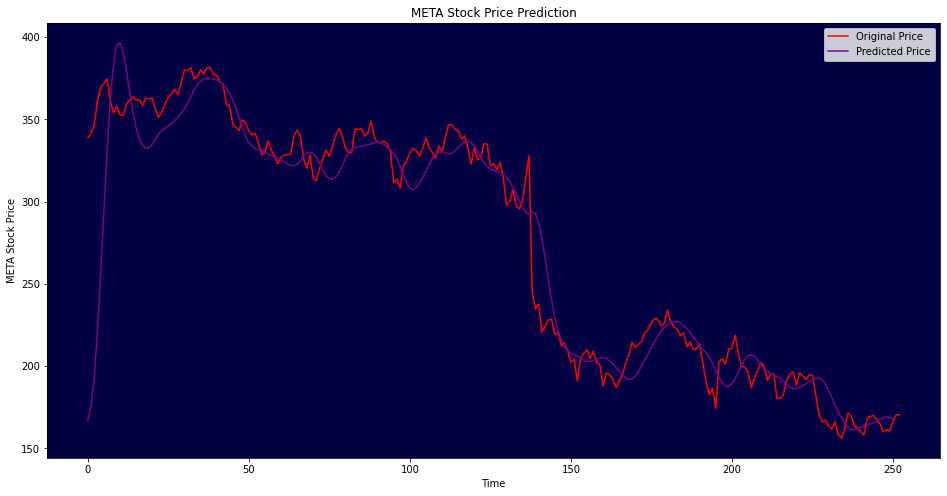

In [55]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000042')
ax.plot(actual_stock_price, color='red', label='Original Price')
plt.plot(predicted_stock_price, color='purple', label='Predicted Price')
plt.title('META Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('META Stock Price')
plt.legend()
plt.show()


Conclusion

So to sum up,I observe that actual_stock_price and Predicted Facebook Stock Price , it shows that Predicted values started with higher than actual values but at the end the values are almost prediciting similar, I see that model performed very good. It is able to accurately
follow most of the unexcepted jumps/drops however, for the most recent date
stamps, we can see that the model expected (predicted) lower values compared
to the real values of the stock price. In order to get a better fit used 30 timestamps in my model.However, For upward or downward spikes, the model is slow to react properly to fast, non-linear changes. However from an overall perspective,I observe that the model performed pretty good of following the upward and downward trends.
